# New York City Crime data analysis in the year 2024

## Import libraries

In [1573]:
# Importing the libraries
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np # linear algebra
import matplotlib.pyplot as plt # plotting library
import seaborn as sns # visualization library
import plotly.express as px # for interactive plots
from math import pi # for radar plots
import folium # for heatmaps
from folium.plugins import HeatMap # for heatmaps
import random # for random sampling

## Import ML libraries

In [1623]:
# Importing ML libraries for the model
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV # for splitting the data and cross validation
from sklearn.ensemble import RandomForestClassifier # for the random forest model
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder # for feature scaling
from sklearn.metrics import accuracy_score, classification_report, mean_squared_error, r2_score # for model evaluation
from sklearn.pipeline import make_pipeline # for creating a pipeline
from sklearn.linear_model import LogisticRegression # for the logistic regression model
import joblib # for saving the model

# Set visualization aesthetics
sns.set(style='whitegrid') # set the background for the plots

# Neural network model
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier

## Load and preview data

In [1575]:
# Load the dataset into pandas dataframe
file_path = 'Resources/Original_NYPD_Complaint_Data_Current__Year_To_Date__20240920.csv'
nypd_df = pd.read_csv(file_path, low_memory=False)

#Display the first few rows of the dataframe
nypd_df.head()

CMPLNT_NUM  ADDR_PCT_CD        BORO_NM CMPLNT_FR_DT CMPLNT_FR_TM  \
0  280510523           14      MANHATTAN   01/11/2024     04:00:00   
1  286736978          122  STATEN ISLAND   01/01/2015     13:00:00   
2  289019347            1      MANHATTAN   06/20/2024     16:12:00   
3  283688417          121  STATEN ISLAND   03/11/2024     10:00:00   
4  280934552          122  STATEN ISLAND   11/14/2023     12:00:00   

  CMPLNT_TO_DT CMPLNT_TO_TM CRM_ATPT_CPTD_CD HADEVELOPT  HOUSING_PSA  ...  \
0          NaN       (null)        COMPLETED     (null)          NaN  ...   
1   01/01/2015     15:00:00        COMPLETED     (null)          NaN  ...   
2   06/20/2024     16:13:00        COMPLETED     (null)          NaN  ...   
3   03/13/2024     13:20:00        COMPLETED     (null)          NaN  ...   
4   11/17/2023     12:00:00        COMPLETED     (null)          NaN  ...   

   TRANSIT_DISTRICT VIC_AGE_GROUP  VIC_RACE VIC_SEX X_COORD_CD Y_COORD_CD  \
0               NaN         18-24     BLACK       F   985764.0   213806.0   
1               NaN         25-44   UNKNOWN       F   954827.0   148519.0   
2               2.0         25-44     BLACK       F   982466.0   197787.0   
3               NaN         25-44     BLACK       F   938414.0   170500.0   
4               NaN           65+     WHITE       M   941085.0   135276.0   

    Latitude  Longitude                                  Lat_Lon  \
0  40.753533 -73.994537    (40.7535327012632, -73.9945368920152)   
1  40.574286 -74.105914    (40.5742856881925, -74.1059144051212)   
2  40.709556 -74.006435  (40.70955616028041, -74.00643483276845)   
3  40.634542 -74.165142                  (40.634542, -74.165142)   
4  40.537874 -74.155293                  (40.537874, -74.155293)   

                       New Georeferenced Column  
0    POINT (-73.9945368920152 40.7535327012632)  
1    POINT (-74.1059144051212 40.5742856881925)  
2  POINT (-74.00643483276845 40.70955616028041)  
3                  POINT (-74.165142 40.634542)  
4                  POINT (-74.155293 40.537874)  

[5 rows x 36 columns]

---

## Explore the data
- Shape 
- Total number of columns 
- Data info
- Total NaN(missing), (null), empty/whitespace, invalid coords, invalid date values

In [1576]:
# SHAPE OF THE DATASET - 

# Check the size of the dataset
print("Dataset shape:", nypd_df.shape)

Dataset shape: (282069, 36)


In [1577]:
# NUMBER OF COLUMNS - 

# Display all the column names
print("Column names:", nypd_df.columns)

Column names: Index(['CMPLNT_NUM', 'ADDR_PCT_CD', 'BORO_NM', 'CMPLNT_FR_DT', 'CMPLNT_FR_TM',
       'CMPLNT_TO_DT', 'CMPLNT_TO_TM', 'CRM_ATPT_CPTD_CD', 'HADEVELOPT',
       'HOUSING_PSA', 'JURISDICTION_CODE', 'JURIS_DESC', 'KY_CD', 'LAW_CAT_CD',
       'LOC_OF_OCCUR_DESC', 'OFNS_DESC', 'PARKS_NM', 'PATROL_BORO', 'PD_CD',
       'PD_DESC', 'PREM_TYP_DESC', 'RPT_DT', 'STATION_NAME', 'SUSP_AGE_GROUP',
       'SUSP_RACE', 'SUSP_SEX', 'TRANSIT_DISTRICT', 'VIC_AGE_GROUP',
       'VIC_RACE', 'VIC_SEX', 'X_COORD_CD', 'Y_COORD_CD', 'Latitude',
       'Longitude', 'Lat_Lon', 'New Georeferenced Column'],
      dtype='object')


In [1578]:
# INFO OF THE DATA TYPES AND NON-NULL COUNT OF ALL THE COLUMNS - 

# Get basic info about the dataset (data types, non-null values)
print(nypd_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 282069 entries, 0 to 282068
Data columns (total 36 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   CMPLNT_NUM                282069 non-null  object 
 1   ADDR_PCT_CD               282069 non-null  int64  
 2   BORO_NM                   282069 non-null  object 
 3   CMPLNT_FR_DT              282069 non-null  object 
 4   CMPLNT_FR_TM              282069 non-null  object 
 5   CMPLNT_TO_DT              267186 non-null  object 
 6   CMPLNT_TO_TM              282069 non-null  object 
 7   CRM_ATPT_CPTD_CD          282069 non-null  object 
 8   HADEVELOPT                282069 non-null  object 
 9   HOUSING_PSA               17650 non-null   float64
 10  JURISDICTION_CODE         282069 non-null  int64  
 11  JURIS_DESC                282069 non-null  object 
 12  KY_CD                     282069 non-null  int64  
 13  LAW_CAT_CD                282069 non-null  o

In [1579]:
# Check for NaN values
nan_values = nypd_df.isnull().sum()

# Check for '(null)' values in the dataset
null_string_values = (nypd_df == '(null)').sum()

# Check for empty strings or strings with just whitespace
empty_or_whitespace = nypd_df.applymap(lambda x: isinstance(x, str) and x.strip() == '').sum()

# Outlier detection: Check for invalid coordinates (e.g., Latitude not between -90 and 90, Longitude not between -180 and 180)
invalid_latitude = ((nypd_df['Latitude'] < -90) | (nypd_df['Latitude'] > 90)).sum()
invalid_longitude = ((nypd_df['Longitude'] < -180) | (nypd_df['Longitude'] > 180)).sum()

# Outlier detection: Check for invalid or missing dates (assuming 'CMPLNT_FR_DT' should be a valid date format)
invalid_dates = pd.to_datetime(nypd_df['CMPLNT_FR_DT'], errors='coerce').isnull().sum()

# Combine all the checks into one DataFrame
combined_irrelevant_values = pd.DataFrame({
    'NaN (missing) Count': nan_values,
    '(null) Count': null_string_values,
    'Empty/Whitespace Count': empty_or_whitespace,
    'Invalid Latitude Count': [invalid_latitude] * len(nan_values),
    'Invalid Longitude Count': [invalid_longitude] * len(nan_values),
    'Invalid Date Count': [invalid_dates] * len(nan_values)
})

# Create a new column that sums up all irrelevant values
combined_irrelevant_values['Total Irrelevant Values'] = combined_irrelevant_values.sum(axis=1)

# Display the result
combined_irrelevant_values


/var/folders/d2/618cxc_x1xqg8ynrw95x2kc80000gn/T/ipykernel_35996/3216938351.py:8: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.



NaN (missing) Count  (null) Count  \
CMPLNT_NUM                                  0             0   
ADDR_PCT_CD                                 0             0   
BORO_NM                                     0           150   
CMPLNT_FR_DT                                0             0   
CMPLNT_FR_TM                                0             0   
CMPLNT_TO_DT                            14883             0   
CMPLNT_TO_TM                                0         14671   
CRM_ATPT_CPTD_CD                            0             0   
HADEVELOPT                                  0        281219   
HOUSING_PSA                            264419             0   
JURISDICTION_CODE                           0             0   
JURIS_DESC                                  0             0   
KY_CD                                       0             0   
LAW_CAT_CD                                  0             0   
LOC_OF_OCCUR_DESC                           0         60868   
OFNS_DESC                                   0             5   
PARKS_NM                                    0        280551   
PATROL_BORO                                 0             0   
PD_CD                                     172             0   
PD_DESC                                     0           172   
PREM_TYP_DESC                               0         12573   
RPT_DT                                      0             0   
STATION_NAME                                0        269621   
SUSP_AGE_GROUP                              0         31808   
SUSP_RACE                                   0         31808   
SUSP_SEX                                    0         31808   
TRANSIT_DISTRICT                       269621             0   
VIC_AGE_GROUP                               0             0   
VIC_RACE                                    0            14   
VIC_SEX                                     0             0   
X_COORD_CD                                  4             0   
Y_COORD_CD                                  4             0   
Latitude                                    4             0   
Longitude                                   4             0   
Lat_Lon                                     4             0   
New Georeferenced Column                    4             0   

                          Empty/Whitespace Count  Invalid Latitude Count  \
CMPLNT_NUM                                     0                       0   
ADDR_PCT_CD                                    0                       0   
BORO_NM                                        0                       0   
CMPLNT_FR_DT                                   0                       0   
CMPLNT_FR_TM                                   0                       0   
CMPLNT_TO_DT                                   0                       0   
CMPLNT_TO_TM                                   0                       0   
CRM_ATPT_CPTD_CD                               0                       0   
HADEVELOPT                                     0                       0   
HOUSING_PSA                                    0                       0   
JURISDICTION_CODE                              0                       0   
JURIS_DESC                                     0                       0   
KY_CD                                          0                       0   
LAW_CAT_CD                                     0                       0   
LOC_OF_OCCUR_DESC                              0                       0   
OFNS_DESC                                      0                       0   
PARKS_NM                                       0                       0   
PATROL_BORO                                    0                       0   
PD_CD                                          0                       0   
PD_DESC                                        0                       0   
PREM_TYP_DESC                                  0                       0   
RPT_DT                

---

## Transform and clean the data 
- Rename all the columns for better understanding.
- Drop unnecessary columns.
- Datetime conversion.
    - Create new columns 'YEAR', 'MONTH', 'WEEKDAY', 'HOUR' from, 'COMPLAINT_FROM_DATE',        'COMPLAINT_FROM_TIME' columns.
- Transform few columns individually
    - 'LAW_CATEGORY_CODE' column - Add severity level for better understanding
    - 'OFFENSE_DESCRIPTION' column - Divide 63 unique values into different types of crimes 
    - Clean 'YEAR', 'SUSPECT' and 'VICTIM' demographics columns because of insufficient, incorrect data
- Drop missing, null, error values in all the columns


In [1580]:
# FULL NAMES OF COLUMNS - 

# Create a dictionary to map the short column names to their full names
column_rename = {
    'CMPLNT_NUM': 'COMPLAINT_NUMBER',
    'ADDR_PCT_CD': 'ADDRESS_PRECINCT_CODE',
    'BORO_NM': 'BOROUGH_NAME',
    'CMPLNT_FR_DT': 'COMPLAINT_FROM_DATE',
    'CMPLNT_FR_TM': 'COMPLAINT_FROM_TIME',
    'CMPLNT_TO_DT': 'COMPLAINT_TO_DATE',
    'CMPLNT_TO_TM': 'COMPLAINT_TO_TIME',
    'CRM_ATPT_CPTD_CD': 'CRIME_ATTEMPT_COMPLETED_CODE',
    'HADEVELOPT': 'HOUSING_DEVELOPMENT',
    'HOUSING_PSA': 'HOUSING_PSA',
    'JURISDICTION_CODE': 'JURISDICTION_CODE',
    'JURIS_DESC': 'JURISDICTION_DESCRIPTION',
    'KY_CD': 'KEY_CODE',
    'LAW_CAT_CD': 'LAW_CATEGORY_CODE',
    'LOC_OF_OCCUR_DESC': 'LOCATION_OF_OCCURRENCE_DESCRIPTION',
    'OFNS_DESC': 'OFFENSE_DESCRIPTION',
    'PARKS_NM': 'PARKS_NAME',
    'PATROL_BORO': 'PATROL_BOROUGH',
    'PD_CD': 'POLICE_DEPARTMENT_CODE',
    'PD_DESC': 'POLICE_DEPARTMENT_DESCRIPTION',
    'PREM_TYP_DESC': 'PREMISES_TYPE_DESCRIPTION',
    'RPT_DT': 'REPORT_DATE',
    'STATION_NAME': 'STATION_NAME',
    'SUSP_AGE_GROUP': 'SUSPECT_AGE_GROUP',
    'SUSP_RACE': 'SUSPECT_RACE',
    'SUSP_SEX': 'SUSPECT_SEX',
    'TRANSIT_DISTRICT': 'TRANSIT_DISTRICT',
    'VIC_AGE_GROUP': 'VICTIM_AGE_GROUP',
    'VIC_RACE': 'VICTIM_RACE',
    'VIC_SEX': 'VICTIM_SEX',
    'X_COORD_CD': 'X_COORDINATE',
    'Y_COORD_CD': 'Y_COORDINATE',
    'Latitude': 'LATITUDE',
    'Longitude': 'LONGITUDE',
    'Lat_Lon': 'LAT_LON',
    'New Georeferenced Column': 'New_Georeferenced_Column'
}

# Rename the columns using the dictionary
df_renamed = nypd_df.rename(columns=column_rename)

df_renamed.head()


COMPLAINT_NUMBER  ADDRESS_PRECINCT_CODE   BOROUGH_NAME COMPLAINT_FROM_DATE  \
0        280510523                     14      MANHATTAN          01/11/2024   
1        286736978                    122  STATEN ISLAND          01/01/2015   
2        289019347                      1      MANHATTAN          06/20/2024   
3        283688417                    121  STATEN ISLAND          03/11/2024   
4        280934552                    122  STATEN ISLAND          11/14/2023   

  COMPLAINT_FROM_TIME COMPLAINT_TO_DATE COMPLAINT_TO_TIME  \
0            04:00:00               NaN            (null)   
1            13:00:00        01/01/2015          15:00:00   
2            16:12:00        06/20/2024          16:13:00   
3            10:00:00        03/13/2024          13:20:00   
4            12:00:00        11/17/2023          12:00:00   

  CRIME_ATTEMPT_COMPLETED_CODE HOUSING_DEVELOPMENT  HOUSING_PSA  ...  \
0                    COMPLETED              (null)          NaN  ...   
1                    COMPLETED              (null)          NaN  ...   
2                    COMPLETED              (null)          NaN  ...   
3                    COMPLETED              (null)          NaN  ...   
4                    COMPLETED              (null)          NaN  ...   

   TRANSIT_DISTRICT VICTIM_AGE_GROUP  VICTIM_RACE VICTIM_SEX X_COORDINATE  \
0               NaN            18-24        BLACK          F     985764.0   
1               NaN            25-44      UNKNOWN          F     954827.0   
2               2.0            25-44        BLACK          F     982466.0   
3               NaN            25-44        BLACK          F     938414.0   
4               NaN              65+        WHITE          M     941085.0   

  Y_COORDINATE   LATITUDE  LONGITUDE                                  LAT_LON  \
0     213806.0  40.753533 -73.994537    (40.7535327012632, -73.9945368920152)   
1     148519.0  40.574286 -74.105914    (40.5742856881925, -74.1059144051212)   
2     197787.0  40.709556 -74.006435  (40.70955616028041, -74.00643483276845)   
3     170500.0  40.634542 -74.165142                  (40.634542, -74.165142)   
4     135276.0  40.537874 -74.155293                  (40.537874, -74.155293)   

                       New_Georeferenced_Column  
0    POINT (-73.9945368920152 40.7535327012632)  
1    POINT (-74.1059144051212 40.5742856881925)  
2  POINT (-74.00643483276845 40.70955616028041)  
3                  POINT (-74.165142 40.634542)  
4                  POINT (-74.155293 40.537874)  

[5 rows x 36 columns]

In [1581]:
# DROP UNNECESSARY COLUMNS - 

# Drop irrelevant columns based on initial exploration
nypd_df_cleaned = df_renamed.drop(columns=[
    'COMPLAINT_TO_DATE', 
    'COMPLAINT_TO_TIME',
    'HOUSING_DEVELOPMENT', 
    'HOUSING_PSA', 
    'KEY_CODE', 
    'PARKS_NAME',
    'POLICE_DEPARTMENT_CODE',
    'POLICE_DEPARTMENT_DESCRIPTION',
    'STATION_NAME', 
    'TRANSIT_DISTRICT', 
    'X_COORDINATE',
    'Y_COORDINATE',
    'LAT_LON',
    'New_Georeferenced_Column'
])
nypd_df_cleaned.head()


COMPLAINT_NUMBER  ADDRESS_PRECINCT_CODE   BOROUGH_NAME COMPLAINT_FROM_DATE  \
0        280510523                     14      MANHATTAN          01/11/2024   
1        286736978                    122  STATEN ISLAND          01/01/2015   
2        289019347                      1      MANHATTAN          06/20/2024   
3        283688417                    121  STATEN ISLAND          03/11/2024   
4        280934552                    122  STATEN ISLAND          11/14/2023   

  COMPLAINT_FROM_TIME CRIME_ATTEMPT_COMPLETED_CODE  JURISDICTION_CODE  \
0            04:00:00                    COMPLETED                  0   
1            13:00:00                    COMPLETED                  0   
2            16:12:00                    COMPLETED                  1   
3            10:00:00                    COMPLETED                  0   
4            12:00:00                    COMPLETED                  0   

  JURISDICTION_DESCRIPTION LAW_CATEGORY_CODE  \
0         N.Y. POLICE DEPT            FELONY   
1         N.Y. POLICE DEPT       MISDEMEANOR   
2      N.Y. TRANSIT POLICE         VIOLATION   
3         N.Y. POLICE DEPT       MISDEMEANOR   
4         N.Y. POLICE DEPT            FELONY   

  LOCATION_OF_OCCURRENCE_DESCRIPTION  ... PREMISES_TYPE_DESCRIPTION  \
0                             INSIDE  ...               HOTEL/MOTEL   
1                             INSIDE  ...           RESIDENCE-HOUSE   
2                             (null)  ...      TRANSIT - NYC SUBWAY   
3                           FRONT OF  ...           MAILBOX OUTSIDE   
4                             INSIDE  ...           RESIDENCE-HOUSE   

  REPORT_DATE SUSPECT_AGE_GROUP SUSPECT_RACE SUSPECT_SEX VICTIM_AGE_GROUP  \
0  01/14/2024             18-24        BLACK           U            18-24   
1  05/11/2024             25-44      UNKNOWN           M            25-44   
2  06/20/2024             45-64        BLACK           M            25-44   
3  03/13/2024            (null)       (null)      (null)            25-44   
4  01/22/2024            (null)       (null)      (null)              65+   

  VICTIM_RACE VICTIM_SEX   LATITUDE  LONGITUDE  
0       BLACK          F  40.753533 -73.994537  
1     UNKNOWN          F  40.574286 -74.105914  
2       BLACK          F  40.709556 -74.006435  
3       BLACK          F  40.634542 -74.165142  
4       WHITE          M  40.537874 -74.155293  

[5 rows x 22 columns]

In [1582]:
# CONVERT TO DATETIME FORMAT - 

# Convert 'COMPLAINT_FROM_DATE' to datetime format
nypd_df_cleaned['COMPLAINT_FROM_DATE'] = pd.to_datetime(nypd_df_cleaned['COMPLAINT_FROM_DATE'], errors='coerce')

# Convert 'COMPLAINT_FROM_TIME' to datetime.time format
nypd_df_cleaned['COMPLAINT_FROM_TIME'] = pd.to_datetime(nypd_df_cleaned['COMPLAINT_FROM_TIME'], format='%H:%M:%S', errors='coerce').dt.time

# COMBINE INTO ONE COLUMN - 

# Combine 'COMPLAINT_FROM_DATE' and 'COMPLAINT_FROM_TIME' into a single datetime column
nypd_df_cleaned['COMPLAINT_DATETIME'] = pd.to_datetime(nypd_df_cleaned['COMPLAINT_FROM_DATE'].astype(str) + ' ' + nypd_df_cleaned['COMPLAINT_FROM_TIME'].astype(str), errors='coerce')


# Extract year, month, week (days), and hour directly from this datetime field
nypd_df_cleaned['YEAR'] = nypd_df_cleaned['COMPLAINT_DATETIME'].dt.year.astype('Int64')
nypd_df_cleaned['MONTH'] = nypd_df_cleaned['COMPLAINT_DATETIME'].dt.month.astype('Int64')
nypd_df_cleaned['WEEKDAY'] = nypd_df_cleaned['COMPLAINT_DATETIME'].dt.day_name()
nypd_df_cleaned['HOUR'] = nypd_df_cleaned['COMPLAINT_DATETIME'].dt.hour.astype('Int64')

# Drop the original 'COMPLAINT_FROM_DATE' and 'COMPLAINT_FROM_TIME' columns to keep only the combined datetime
nypd_df_cleaned.drop(['COMPLAINT_FROM_DATE', 'COMPLAINT_FROM_TIME', 'COMPLAINT_DATETIME'], axis=1, inplace=True)

# Display the updated dataframe with the new 'COMPLAINT_DATETIME' column
print(nypd_df_cleaned[['YEAR', 'MONTH', 'WEEKDAY', 'HOUR']].head())

   YEAR  MONTH   WEEKDAY  HOUR
0  2024      1  Thursday     4
1  2015      1  Thursday    13
2  2024      6  Thursday    16
3  2024      3    Monday    10
4  2023     11   Tuesday    12


In [1583]:
# Display clean data after dropping and adding new columns
nypd_df_cleaned.head()

COMPLAINT_NUMBER  ADDRESS_PRECINCT_CODE   BOROUGH_NAME  \
0        280510523                     14      MANHATTAN   
1        286736978                    122  STATEN ISLAND   
2        289019347                      1      MANHATTAN   
3        283688417                    121  STATEN ISLAND   
4        280934552                    122  STATEN ISLAND   

  CRIME_ATTEMPT_COMPLETED_CODE  JURISDICTION_CODE JURISDICTION_DESCRIPTION  \
0                    COMPLETED                  0         N.Y. POLICE DEPT   
1                    COMPLETED                  0         N.Y. POLICE DEPT   
2                    COMPLETED                  1      N.Y. TRANSIT POLICE   
3                    COMPLETED                  0         N.Y. POLICE DEPT   
4                    COMPLETED                  0         N.Y. POLICE DEPT   

  LAW_CATEGORY_CODE LOCATION_OF_OCCURRENCE_DESCRIPTION OFFENSE_DESCRIPTION  \
0            FELONY                             INSIDE                RAPE   
1       MISDEMEANOR                             INSIDE          SEX CRIMES   
2         VIOLATION                             (null)       HARRASSMENT 2   
3       MISDEMEANOR                           FRONT OF       PETIT LARCENY   
4            FELONY                             INSIDE       GRAND LARCENY   

              PATROL_BOROUGH  ... SUSPECT_SEX VICTIM_AGE_GROUP VICTIM_RACE  \
0      PATROL BORO MAN SOUTH  ...           U            18-24       BLACK   
1  PATROL BORO STATEN ISLAND  ...           M            25-44     UNKNOWN   
2      PATROL BORO MAN SOUTH  ...           M            25-44       BLACK   
3  PATROL BORO STATEN ISLAND  ...      (null)            25-44       BLACK   
4  PATROL BORO STATEN ISLAND  ...      (null)              65+       WHITE   

  VICTIM_SEX   LATITUDE  LONGITUDE  YEAR MONTH   WEEKDAY  HOUR  
0          F  40.753533 -73.994537  2024     1  Thursday     4  
1          F  40.574286 -74.105914  2015     1  Thursday    13  
2          F  40.709556 -74.006435  2024     6  Thursday    16  
3          F  40.634542 -74.165142  2024     3    Monday    10  
4          M  40.537874 -74.155293  2023    11   Tuesday    12  

[5 rows x 24 columns]

#### year column - keep the data only for the year 2024. Rest of the years has too little information.

In [1584]:
# Check the year column
nypd_df_cleaned['YEAR'].value_counts()

# Keep only the data for the year 2024 and drop the rest
nypd_df_cleaned = nypd_df_cleaned[nypd_df_cleaned['YEAR'].isin([2024])]
nypd_df_cleaned['YEAR'].value_counts()



YEAR
2024    272601
Name: count, dtype: Int64

#### law category column - adding severity level in front of each category for better understanding

In [1585]:
# Add the severity level to the values in the law category code column, example - 'FELONY (SEVERE)', 'MISDEMEANOR (MODERATE)', 'VIOLATION (MINOR)'

nypd_df_cleaned['LAW_CATEGORY_CODE'] = nypd_df_cleaned['LAW_CATEGORY_CODE'].replace({'FELONY': 'FELONY (SEVERE CRIME)', 'MISDEMEANOR': 'MISDEMEANOR (MODERATE CRIME)', 'VIOLATION': 'VIOLATION (MINOR CRIME)'})
nypd_df_cleaned['LAW_CATEGORY_CODE'].value_counts()

LAW_CATEGORY_CODE
MISDEMEANOR (MODERATE CRIME)    142298
FELONY (SEVERE CRIME)            87860
VIOLATION (MINOR CRIME)          42443
Name: count, dtype: int64

#### offense description column - check the unique offenses value and categorize each offense in a new column offense category for achieving better visualizations

In [1586]:
# CHECK OFFENSE_DESCRIPTION COLUMN -

# Get unique values and their counts for the Offense_Description column
nypd_df_cleaned['OFFENSE_DESCRIPTION'].value_counts()


OFFENSE_DESCRIPTION
PETIT LARCENY                     50699
HARRASSMENT 2                     40795
ASSAULT 3 & RELATED OFFENSES      30431
GRAND LARCENY                     21512
CRIMINAL MISCHIEF & RELATED OF    19222
                                  ...  
LOITERING/GAMBLING (CARDS, DIC        3
ANTICIPATORY OFFENSES                 2
FORTUNE TELLING                       2
OTHER TRAFFIC INFRACTION              1
LOITERING                             1
Name: count, Length: 63, dtype: int64

In [1587]:
# Get the unique values from the OFFENSE_DESCRIPTION column
unique_offenses = nypd_df_cleaned['OFFENSE_DESCRIPTION'].unique()

# # Display all unique values
print(f'Total number of unique offense descriptions: {len(unique_offenses)}')
print(unique_offenses)

Total number of unique offense descriptions: 63
['RAPE' 'HARRASSMENT 2' 'PETIT LARCENY' 'CRIMINAL MISCHIEF & RELATED OF'
 'GRAND LARCENY OF MOTOR VEHICLE' 'OFF. AGNST PUB ORD SENSBLTY &'
 'VEHICLE AND TRAFFIC LAWS' 'ROBBERY' 'GRAND LARCENY'
 'CANNABIS RELATED OFFENSES' 'FELONY ASSAULT'
 'NYS LAWS-UNCLASSIFIED FELONY' 'OFFENSES INVOLVING FRAUD'
 'INTOXICATED & IMPAIRED DRIVING' 'GAMBLING'
 'ASSAULT 3 & RELATED OFFENSES' 'DISORDERLY CONDUCT'
 'OFFENSES AGAINST PUBLIC ADMINI' 'BURGLARY' 'DANGEROUS DRUGS'
 'POSSESSION OF STOLEN PROPERTY' 'OFFENSES AGAINST PUBLIC SAFETY' 'FRAUDS'
 'CRIMINAL TRESPASS' 'THEFT-FRAUD' 'MISCELLANEOUS PENAL LAW'
 'UNAUTHORIZED USE OF A VEHICLE' 'ARSON' 'MURDER & NON-NEGL. MANSLAUGHTER'
 'OFFENSES AGAINST THE PERSON' 'SEX CRIMES' 'DANGEROUS WEAPONS' 'FORGERY'
 'AGRICULTURE & MRKTS LAW-UNCLASSIFIED' 'OTHER STATE LAWS'
 'ADMINISTRATIVE CODE' 'OTHER STATE LAWS (NON PENAL LA'
 'KIDNAPPING & RELATED OFFENSES' 'FRAUDULENT ACCOSTING'
 'DISRUPTION OF A RELIGIOUS SERV' 'OF

In [1588]:

# Define a function to categorize offenses
def categorize_offense(description):
    description = description.upper()

    # Violent Crimes
    if description in ['RAPE', 'SEX CRIMES', 'MURDER & NON-NEGL. MANSLAUGHTER', 'FELONY ASSAULT', 
                       'ROBBERY', 'ASSAULT 3 & RELATED OFFENSES', 'KIDNAPPING & RELATED OFFENSES',
                       'FELONY SEX CRIMES', 'HOMICIDE-NEGLIGENT,UNCLASSIFIED', 'KIDNAPPING']:
        return 'VIOLENT CRIME'
    
    # Property Crimes
    elif description in ['PETIT LARCENY', 'GRAND LARCENY', 'CRIMINAL MISCHIEF & RELATED OF',
                         'GRAND LARCENY OF MOTOR VEHICLE', 'CRIMINAL TRESPASS', 'BURGLARY', 
                         'POSSESSION OF STOLEN PROPERTY', 'UNAUTHORIZED USE OF A VEHICLE', 
                         'ARSON', "BURGLAR'S TOOLS", 'PETIT LARCENY OF MOTOR VEHICLE', 'THEFT OF SERVICES']:
        return 'PROPERTY CRIME'
    
    # Drug/Alcohol-Related Crimes
    elif description in ['CANNABIS RELATED OFFENSES', 'DANGEROUS DRUGS', 
                         'INTOXICATED & IMPAIRED DRIVING', 'INTOXICATED/IMPAIRED DRIVING',
                         'ALCOHOLIC BEVERAGE CONTROL LAW']:
        return 'DRUG/ALCOHOL CRIME'
    
    # Public Order Crimes
    elif description in ['DISORDERLY CONDUCT', 'LOITERING', 'LOITERING/GAMBLING (CARDS, DIC)', 
                         'GAMBLING', 'PROSTITUTION & RELATED OFFENSES', 'JOSTLING', 
                         'DISRUPTION OF A RELIGIOUS SERV', 'FORTUNE TELLING', 'ESCAPE 3',
                         'DISORDERLY CONDUCT', 'UNLAWFUL POSS. WEAP. ON SCHOOL']:
        return 'PUBLIC ORDER CRIME'
    
    # Offenses Against Public Safety/Administration
    elif description in ['OFFENSES INVOLVING FRAUD', 'FRAUDS', 'THEFT-FRAUD', 
                         'OFFENSES AGAINST PUBLIC ADMINI', 'OFFENSES AGAINST PUBLIC SAFETY', 
                         'OFFENSES AGAINST THE PERSON', 'ADMINISTRATIVE CODE', 'FRAUDULENT ACCOSTING', 
                         'ANTICIPATORY OFFENSES', 'OFFENSES RELATED TO CHILDREN', 'CHILD ABANDONMENT/NON SUPPORT',
                         'ENDAN WELFARE INCOMP', 'OTHER OFFENSES RELATED TO THEF', 'OTHER TRAFFIC INFRACTION']:
        return 'OFFENSES AGAINST PUBLIC SAFETY'
    
    # Miscellaneous Crimes
    else:
        return 'MISCELLANEOUS CRIME'

# Apply the categorization functions to the dataset
nypd_df_cleaned['CRIME_CLASSIFICATION_TYPES'] = nypd_df_cleaned['OFFENSE_DESCRIPTION'].apply(categorize_offense)

# Drop the original 'OFFENSE_DESCRIPTION' column
# nypd_df_cleaned.drop('OFFENSE_DESCRIPTION', axis=1, inplace=True)

# Display the first few rows to confirm the changes
print(nypd_df_cleaned[['CRIME_CLASSIFICATION_TYPES']].head())


  CRIME_CLASSIFICATION_TYPES
0              VIOLENT CRIME
2        MISCELLANEOUS CRIME
3             PROPERTY CRIME
6             PROPERTY CRIME
7             PROPERTY CRIME


#### suspect demographics columns - check and drop any irrevalent values in the columns of suspect demographics

In [1589]:
# CHECK SUSPECT_AGE_GROUP COLUMN
nypd_df_cleaned['SUSPECT_AGE_GROUP'].value_counts()

SUSPECT_AGE_GROUP
UNKNOWN    100888
25-44       83057
(null)      29883
45-64       27962
18-24       21396
<18          6328
65+          3074
2024            3
-972            1
934             1
-30             1
958             1
943             1
-959            1
953             1
-924            1
-951            1
1024            1
Name: count, dtype: int64

In [1590]:
# Define valid age groups
valid_age_groups = ['<18', '18-24', '25-44', '45-64', '65+']

# Filter the DataFrame to keep only rows where 'SUSPECT_AGE_GROUP' is in the valid age groups
nypd_df_cleaned = nypd_df_cleaned[nypd_df_cleaned['SUSPECT_AGE_GROUP'].isin(valid_age_groups)]

# Check the updated values
print(nypd_df_cleaned['SUSPECT_AGE_GROUP'].value_counts())

SUSPECT_AGE_GROUP
25-44    83057
45-64    27962
18-24    21396
<18       6328
65+       3074
Name: count, dtype: int64


In [1591]:
# CHECK SUSPECT_RACE COLUMN
nypd_df_cleaned['SUSPECT_RACE'].value_counts()

SUSPECT_RACE
BLACK                             64360
WHITE HISPANIC                    36020
WHITE                             15718
BLACK HISPANIC                    12007
ASIAN / PACIFIC ISLANDER           7972
UNKNOWN                            5269
AMERICAN INDIAN/ALASKAN NATIVE      471
Name: count, dtype: int64

In [1592]:
# CHECK SUSPECT_SEX COLUMN
nypd_df_cleaned['SUSPECT_SEX'].value_counts()

SUSPECT_SEX
M    109524
F     29905
U      2388
Name: count, dtype: int64

#### victim demographics columns - check and drop any irrevalent values in the columns of suspect demographics

In [1593]:
# CHECK VICTIM_AGE_GROUP COLUMN
nypd_df_cleaned['VICTIM_AGE_GROUP'].value_counts()

VICTIM_AGE_GROUP
UNKNOWN    56908
25-44      43421
45-64      19276
18-24      10953
<18         6648
65+         4606
-973           1
-951           1
928            1
960            1
934            1
Name: count, dtype: int64

In [1594]:
# Define valid age groups
valid_age_groups = ['<18', '18-24', '25-44', '45-64', '65+']

# Filter the DataFrame to keep only rows where 'SUSPECT_AGE_GROUP' is in the valid age groups
nypd_df_cleaned = nypd_df_cleaned[nypd_df_cleaned['VICTIM_AGE_GROUP'].isin(valid_age_groups)]

# Check the updated values
print(nypd_df_cleaned['VICTIM_AGE_GROUP'].value_counts())

VICTIM_AGE_GROUP
25-44    43421
45-64    19276
18-24    10953
<18       6648
65+       4606
Name: count, dtype: int64


In [1595]:
# CHECK VICTIM_RACE COLUMN
nypd_df_cleaned['VICTIM_RACE'].value_counts()

VICTIM_RACE
BLACK                             31078
WHITE HISPANIC                    23770
WHITE                             12953
ASIAN / PACIFIC ISLANDER           7538
BLACK HISPANIC                     5688
UNKNOWN                            3465
AMERICAN INDIAN/ALASKAN NATIVE      412
Name: count, dtype: int64

In [1596]:
# CHECK VICTIM_SEX COLUMN

nypd_df_cleaned['VICTIM_SEX'].value_counts()

VICTIM_SEX
F    50708
M    32521
L     1654
E       17
D        4
Name: count, dtype: int64

In [1597]:
# Replace 'D', 'E', 'L' with 'Unknown'
nypd_df_cleaned['VICTIM_SEX'] = nypd_df_cleaned['VICTIM_SEX'].replace({'D': 'Unknown', 'E': 'Unknown', 'L': 'Unknown'})

# Check the updated values
print(nypd_df_cleaned['VICTIM_SEX'].value_counts())

VICTIM_SEX
F          50708
M          32521
Unknown     1675
Name: count, dtype: int64


#### Drop missing and any other irrelevant values in all the columns

In [1598]:
# Step 1: Convert numeric columns to proper numeric format to handle errors (e.g., latitude, longitude)
nypd_df_cleaned['LATITUDE'] = pd.to_numeric(nypd_df_cleaned['LATITUDE'], errors='coerce')
nypd_df_cleaned['LONGITUDE'] = pd.to_numeric(nypd_df_cleaned['LONGITUDE'], errors='coerce')

# Step 2: Drop rows where LATITUDE or LONGITUDE became NaN after the conversion (if they are important for analysis)
nypd_df_cleaned.dropna(subset=['BOROUGH_NAME', 'LATITUDE', 'LONGITUDE'], inplace=True)

# Step 3: Replace empty strings with NaN to handle non-informative values
nypd_df_cleaned.replace("", pd.NA, inplace=True)

# Step 4: Define other non-informative values like "Unknown", "N/A", etc. and drop rows with these values
non_informative_values = [
    "Unknown", 
    "(null)", 
    "NaN", 
    "N/A", 
    "None"
    ]
for val in non_informative_values:
   for col in nypd_df_cleaned.columns:
        nypd_df_cleaned = nypd_df_cleaned.loc[nypd_df_cleaned[col] != val]

# Step 5: Recheck for missing values after cleaning
missing_values_after_cleaning = nypd_df_cleaned.isnull().sum()
print("Irrelevant values in each column after cleaning:")
# Display how many missing values remain (should be 0 after dropna)
print(nypd_df_cleaned.isnull().sum())


Irrelevant values in each column after cleaning:
COMPLAINT_NUMBER                      0
ADDRESS_PRECINCT_CODE                 0
BOROUGH_NAME                          0
CRIME_ATTEMPT_COMPLETED_CODE          0
JURISDICTION_CODE                     0
JURISDICTION_DESCRIPTION              0
LAW_CATEGORY_CODE                     0
LOCATION_OF_OCCURRENCE_DESCRIPTION    0
OFFENSE_DESCRIPTION                   0
PATROL_BOROUGH                        0
PREMISES_TYPE_DESCRIPTION             0
REPORT_DATE                           0
SUSPECT_AGE_GROUP                     0
SUSPECT_RACE                          0
SUSPECT_SEX                           0
VICTIM_AGE_GROUP                      0
VICTIM_RACE                           0
VICTIM_SEX                            0
LATITUDE                              0
LONGITUDE                             0
YEAR                                  0
MONTH                                 0
WEEKDAY                               0
HOUR                           

In [1599]:
# # Get a list of all column names in the DataFrame
cols=nypd_df_cleaned.columns.tolist()

# Iterate through each column name in the DataFrame
for c in cols:
    temp_df = nypd_df_cleaned.loc[nypd_df_cleaned[c] == pd.NA] # Create a temporary DataFrame containing only rows where the value in column 'c' is NaN (missing value)
    print(c, len(temp_df)) # Print the column name and the number of rows where the value in that column is NaN

COMPLAINT_NUMBER 0
ADDRESS_PRECINCT_CODE 0
BOROUGH_NAME 0
CRIME_ATTEMPT_COMPLETED_CODE 0
JURISDICTION_CODE 0
JURISDICTION_DESCRIPTION 0
LAW_CATEGORY_CODE 0
LOCATION_OF_OCCURRENCE_DESCRIPTION 0
OFFENSE_DESCRIPTION 0
PATROL_BOROUGH 0
PREMISES_TYPE_DESCRIPTION 0
REPORT_DATE 0
SUSPECT_AGE_GROUP 0
SUSPECT_RACE 0
SUSPECT_SEX 0
VICTIM_AGE_GROUP 0
VICTIM_RACE 0
VICTIM_SEX 0
LATITUDE 0
LONGITUDE 0
YEAR 0
MONTH 0
WEEKDAY 0
HOUR 0
CRIME_CLASSIFICATION_TYPES 0


---

### Final reframed and cleaned data

In [1600]:
# Print the final clean data
nypd_df_cleaned

COMPLAINT_NUMBER  ADDRESS_PRECINCT_CODE   BOROUGH_NAME  \
0             280510523                     14      MANHATTAN   
8             279912363                      1      MANHATTAN   
9             280861247                    122  STATEN ISLAND   
18            287050744                    123  STATEN ISLAND   
23            284724004                    123  STATEN ISLAND   
...                 ...                    ...            ...   
282057        283176395                    105         QUEENS   
282058        286351325                    105         QUEENS   
282059        288302189                    113         QUEENS   
282061        282168499                    113         QUEENS   
282063        284321493                    101         QUEENS   

       CRIME_ATTEMPT_COMPLETED_CODE  JURISDICTION_CODE  \
0                         COMPLETED                  0   
8                         COMPLETED                  0   
9                         COMPLETED                  0   
18                        COMPLETED                  0   
23                        COMPLETED                  0   
...                             ...                ...   
282057                    COMPLETED                  0   
282058                    COMPLETED                  0   
282059                    COMPLETED                  0   
282061                    COMPLETED                  0   
282063                    COMPLETED                  0   

       JURISDICTION_DESCRIPTION             LAW_CATEGORY_CODE  \
0              N.Y. POLICE DEPT         FELONY (SEVERE CRIME)   
8              N.Y. POLICE DEPT         FELONY (SEVERE CRIME)   
9              N.Y. POLICE DEPT  MISDEMEANOR (MODERATE CRIME)   
18             N.Y. POLICE DEPT         FELONY (SEVERE CRIME)   
23             N.Y. POLICE DEPT         FELONY (SEVERE CRIME)   
...                         ...                           ...   
282057         N.Y. POLICE DEPT       VIOLATION (MINOR CRIME)   
282058         N.Y. POLICE DEPT       VIOLATION (MINOR CRIME)   
282059         N.Y. POLICE DEPT       VIOLATION (MINOR CRIME)   
282061         N.Y. POLICE DEPT         FELONY (SEVERE CRIME)   
282063         N.Y. POLICE DEPT         FELONY (SEVERE CRIME)   

       LOCATION_OF_OCCURRENCE_DESCRIPTION             OFFENSE_DESCRIPTION  \
0                                  INSIDE                            RAPE   
8                                FRONT OF  GRAND LARCENY OF MOTOR VEHICLE   
9                                  INSIDE   OFF. AGNST PUB ORD SENSBLTY &   
18                               FRONT OF                         ROBBERY   
23                                 INSIDE                  FELONY ASSAULT   
...                                   ...                             ...   
282057                           FRONT OF                   HARRASSMENT 2   
282058                           FRONT OF                   HARRASSMENT 2   
282059                           FRONT OF                   HARRASSMENT 2   
282061                             INSIDE         MISCELLANEOUS PENAL LAW   
282063                             INSIDE         MISCELLANEOUS PENAL LAW   

                   PATROL_BOROUGH  ... VICTIM_AGE_GROUP     VICTIM_RACE  \
0           PATROL BORO MAN SOUTH  ...            18-24           BLACK   
8           PATROL BORO MAN SOUTH  ...            25-44           BLACK   
9       PATROL BORO STATEN ISLAND  ...            45-64           WHITE   
18      PATROL BORO STATEN ISLAND  ...            45-64           WHITE   
23      PATROL BORO STATEN ISLAND  ...            45-64  WHITE HISPANIC   
...                           ...  ...              ...             ...   
282057   PATROL BORO QUEENS SOUTH  ...            25-44           BLACK   
282058   PATROL BORO QUEENS SOUTH  ...            25-44           BLACK   
282059   PATROL BORO QUEENS SOUTH  ...            25-44         UNKNOWN   
282061   PATROL BORO QUEENS SOUTH  ...            25-44           BLACK  

## Extract and Load the clean data in to a new csv file

In [1601]:
# SAVE THE NEW CLEAN CSV FILE

# Step 7: Save the cleaned data to a new CSV file 
nypd_df_cleaned.to_csv("Cleaned_NYPD_Complaint_Data.csv", index=False)

print("Data cleaning complete, cleaned data saved to 'Cleaned_NYPD_Complaint_Data.csv'")

# Verify the changes
print(f"Original dataset size: {nypd_df.shape}")
print(f"Dataset size after dropping rows with missing values: {nypd_df_cleaned.shape}")


Data cleaning complete, cleaned data saved to 'Cleaned_NYPD_Complaint_Data.csv'
Original dataset size: (282069, 36)
Dataset size after dropping rows with missing values: (70084, 25)


---

## Binary Classification: Felony vs. Not-Felony
Encoding the `LAW_CATEGORY_CODE` column to create a binary classifier, where:
- `1` represents **felony**
- `0` represents **misdemeanor** and **violation**

This prepares the dataset for binary classification modeling.


In [1602]:
# Step 1: Load the cleaned CSV file
file_path = 'Resources/Cleaned_NYPD_Complaint_Data.csv'
nypd_df_cleaned = pd.read_csv(file_path, low_memory=False)

# Step 2: Encode the 'LAW_CATEGORY_CODE' column
# Map 'felony' to 1 and everything else ('misdemeanor', 'violation') to 0
nypd_df_cleaned['FELONY_INDICATOR'] = nypd_df_cleaned['LAW_CATEGORY_CODE'].apply(lambda x: 1 if x.lower() == 'felony' else 0)

# Step 3: Confirm the encoding worked by checking the value counts
print(nypd_df_cleaned['FELONY_INDICATOR'].value_counts())


FELONY_INDICATOR
0    70084
Name: count, dtype: int64


## Exploratory Data Analysis with visualizations

#### 1. What are the most common types of crimes in New York City?

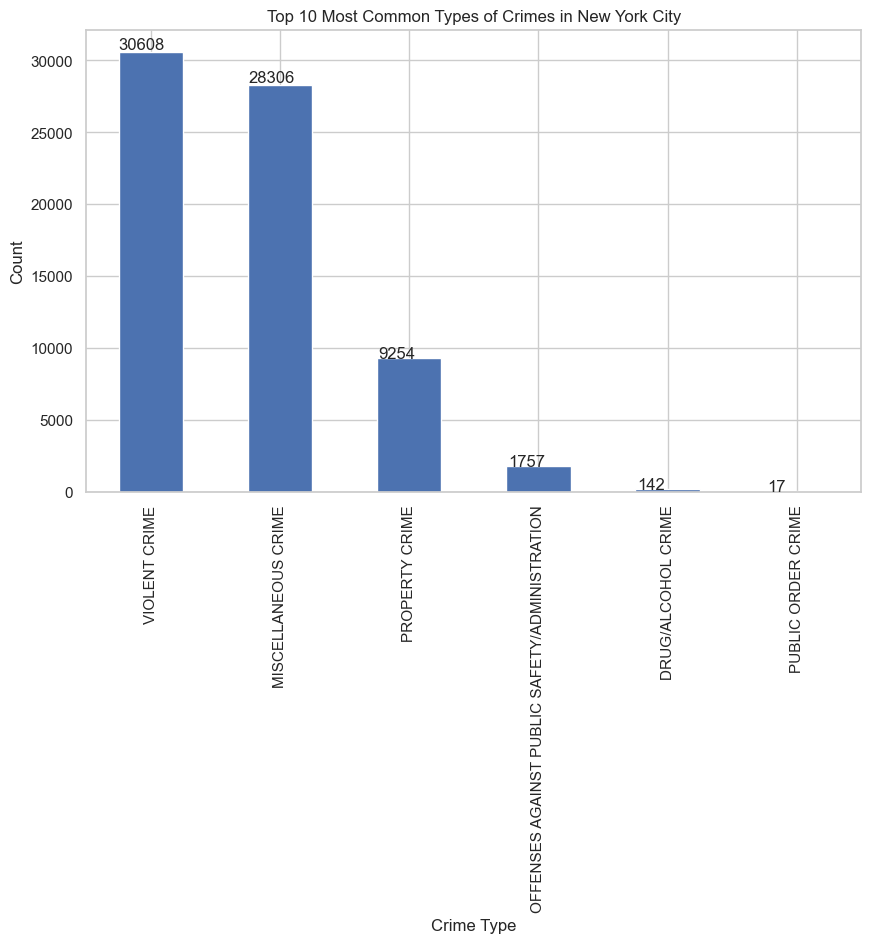

In [1603]:
# Plot the most common crime types
plt.figure(figsize=(10, 6))
ax = nypd_df_cleaned['CRIME_CLASSIFICATION_TYPES'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 Most Common Types of Crimes in New York City')
plt.xlabel('Crime Type')
plt.ylabel('Count')

# Add the count labels on top of each bar
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

plt.show()

This distribution using matplotlib highlights that violent and property-related crimes dominate the overall crime landscape in New York City, while public order and drug-related offenses are much less common.

#### 2. How do crime rates vary across the different boroughs of New York City?

In [1604]:
# Crimes by Severity Level with hover tool
severity_counts = nypd_df_cleaned.groupby(['BOROUGH_NAME', 'LAW_CATEGORY_CODE']).size().reset_index(name='count')
fig = px.bar(severity_counts, x='BOROUGH_NAME', y='count', color='LAW_CATEGORY_CODE', 
             title='Crime Rates by Borough and Severity Level in NYC', 
             labels={'count': 'Number of Crimes', 'BOROUGH_NAME': 'Borough', 'LAW_CATEGORY_CODE': 'Crime Category'},
             hover_data={'count': True})

fig.update_layout(barmode='group', xaxis_tickangle=-55, height=600)
fig.show()


Above interactive visualization using plotly highlights that **misdemeanors** tend to dominate the crime landscape across all boroughs, while **felonies** and **violations** show more variation depending on the borough.

#### 3. How do crime rates fluctuate over time (by day, week, and month)?

In [1605]:
# Step 1: Group by WEEKDAY, MONTH, and HOUR to get the crime counts
crime_by_weekday = nypd_df_cleaned.groupby('WEEKDAY').size().reset_index(name='Crime_Count')
crime_by_hour = nypd_df_cleaned.groupby('HOUR').size().reset_index(name='Crime_Count')
crime_by_month = nypd_df_cleaned.groupby('MONTH').size().reset_index(name='Crime_Count')

# Step 2: Sorting the weekday order (for better plotting)
ordered_weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
crime_by_weekday['WEEKDAY'] = pd.Categorical(crime_by_weekday['WEEKDAY'], categories=ordered_weekdays, ordered=True)
crime_by_weekday = crime_by_weekday.sort_values('WEEKDAY')

# Step 3: Plotting the crime counts using Plotly for interactive charts

# Crime counts by weekday
fig_weekday = px.line(crime_by_weekday, x='WEEKDAY', y='Crime_Count', title="Crime Counts by Day of the Week")
fig_weekday.show()

# Crime counts by hour
fig_hour = px.line(crime_by_hour, x='HOUR', y='Crime_Count', title="Crime Counts by Hour of the Day")
fig_hour.show()

# Crime counts by month
# Mapping month numbers to month names
month_names = {1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June'}
crime_by_month['MONTH'] = crime_by_month['MONTH'].map(month_names)
fig_month = px.line(crime_by_month, x='MONTH', y='Crime_Count', title="Crime Counts by Month")
fig_month.show()

- **Crime Counts by Day of the Week**: Crime activity is highest on weekends, particularly on Sunday, with lower counts mid-week which is a very basic pattern as more people are out on the weekends which leads to more criminal activities.

- **Crime Counts by Hour of the Day**: Crime rates steadily increase throughout the day, peaking in the late evening and dropping after midnight which again indicates more availability of the victims during the evenings after free from work.
  
- **Crime Counts by Month**: Crime rates fluctuate by month, with a noticeable peak in May when the summer starts and a dip in February when its freezing.


#### 4. Which demographic groups are most affected by crimes?

##### Victim demographic analysis

In [1606]:
# Stacked bar plot for victim demographic analysis
fig_victim_demographics = px.histogram(nypd_df_cleaned, x='VICTIM_AGE_GROUP', color='VICTIM_RACE', 
                                       title='Crimes Affecting Different Victim Demographic Groups',
                                       labels={'VICTIM_AGE_GROUP':'Age Group', 'VICTIM_RACE':'Victim Race'},
                                       barmode='stack', color_discrete_sequence=px.colors.qualitative.Pastel)
fig_victim_demographics.update_layout(xaxis_title='Victim Age Group', yaxis_title='Count')
fig_victim_demographics.show()

##### Suspect demographic analysis

In [1607]:
# Stacked bar plot for suspect demographic analysis
fig_suspect_demographics = px.histogram(nypd_df_cleaned, x='SUSPECT_AGE_GROUP', color='SUSPECT_RACE', 
                                       title='Crimes by Different Suspect Demographic Groups',
                                       labels={'SUSPECT_AGE_GROUP':'Age Group', 'SUSPECT_RACE':'Suspect Race'},
                                       barmode='stack', color_discrete_sequence=px.colors.qualitative.Pastel)
fig_suspect_demographics.update_layout(xaxis_title='Suspect Age Group', yaxis_title='Count')
fig_suspect_demographics.show()

#### 6. Where are the major crime hotspots located in New York City?

In [1608]:
# Crime Density Heatmap

# Step 1: Initialize a folium map centered around NYC coordinates
nyc_map = folium.Map(location=[40.7128, -74.0060], zoom_start=11)

# Step 2: Prepare data for heatmap (only latitude and longitude)
crime_locations = nypd_df_cleaned[['LATITUDE', 'LONGITUDE']].dropna()

# Step 3: Create a heatmap overlay using folium's HeatMap
HeatMap(data=crime_locations, radius=10, max_zoom=13).add_to(nyc_map)

# Step 4: Display the map
nyc_map


#### Further Analysis

##### Rate of crimes by severity levels

In [1609]:
# Pie chart for severity levels with hover tool
severity_counts = nypd_df_cleaned['LAW_CATEGORY_CODE'].value_counts()
fig = px.pie(values=severity_counts, names=severity_counts.index, title='Distribution of Severity Levels',
             color_discrete_sequence=['#ff9999','#66b3ff','#99ff99'])

fig.update_traces(textinfo='percent+label', hoverinfo='label+percent+value')
fig.show()

##### Radar Chart Comparing Crime Rates Across Boroughs

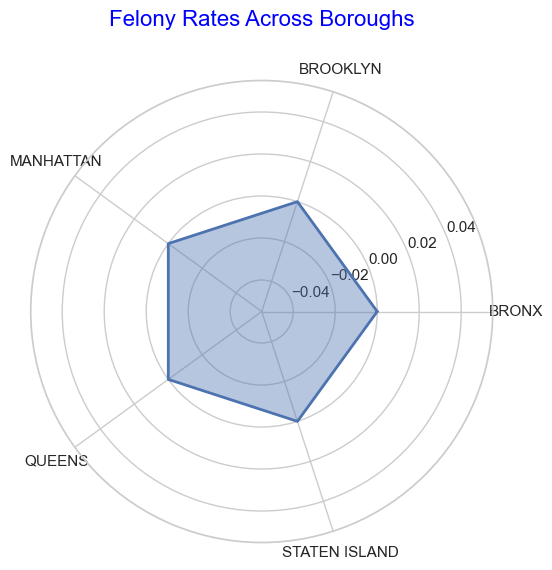

In [1610]:
import matplotlib.pyplot as plt
import numpy as np
from math import pi

# Step 1: Prepare the data
borough_grouped = nypd_df_cleaned.groupby('BOROUGH_NAME')['FELONY_INDICATOR'].mean()
categories = borough_grouped.index.tolist()
values = borough_grouped.values.flatten().tolist()

# Add the first value to the end to close the circle
values += values[:1]
N = len(categories)

# Step 2: Compute the angle for each axis
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]  # Ensure the plot closes

# Step 3: Plot the radar chart
plt.figure(figsize=(6, 6))
ax = plt.subplot(111, polar=True)

# Draw the outline of the radar chart
plt.xticks(angles[:-1], categories)

# Plot the data
ax.plot(angles, values, linewidth=2, linestyle='solid')

# Fill the area
ax.fill(angles, values, 'b', alpha=0.4)

# Add a title
plt.title('Felony Rates Across Boroughs', size=16, color='blue', y=1.1)

# Show the radar chart
plt.show()


## Analysis of Felony Rates Across Boroughs

The radar chart compares felony rates across the five boroughs of New York City. Key insights include:
- **Bronx** and **Brooklyn** show the highest felony rates compared to the other boroughs.
- **Manhattan** and **Queens** have moderate felony rates, while **Staten Island** has the lowest rate.
- Overall, there is noticeable variation in felony rates, with the outer boroughs experiencing higher felony activity.

This chart highlights that crime severity varies significantly between boroughs, with Bronx and Brooklyn having relatively higher felony rates.


---

## Supervised Machine Learning Model
- Preprocessing: Handle missing data, feature selection, and scaling if necessary.
- Train/Test Split: Split the data into training and testing sets.
- Model Selection: We’ll start with a basic Logistic Regression model and then improve using a more complex model (like Random Forest or Gradient Boosting) if needed.
- Evaluation: Measure classification accuracy and try to achieve at least 75% accuracy.

In [1611]:
# First, check the data types of the columns.
nypd_df_cleaned.dtypes

COMPLAINT_NUMBER                       object
ADDRESS_PRECINCT_CODE                   int64
BOROUGH_NAME                           object
CRIME_ATTEMPT_COMPLETED_CODE           object
JURISDICTION_CODE                       int64
JURISDICTION_DESCRIPTION               object
LAW_CATEGORY_CODE                      object
LOCATION_OF_OCCURRENCE_DESCRIPTION     object
OFFENSE_DESCRIPTION                    object
PATROL_BOROUGH                         object
PREMISES_TYPE_DESCRIPTION              object
REPORT_DATE                            object
SUSPECT_AGE_GROUP                      object
SUSPECT_RACE                           object
SUSPECT_SEX                            object
VICTIM_AGE_GROUP                       object
VICTIM_RACE                            object
VICTIM_SEX                             object
LATITUDE                              float64
LONGITUDE                             float64
YEAR                                    int64
MONTH                             

##### Handling numerical columns (normalization) and categorical columns (label encoding). This ensures that the data is ready for machine learning algorithms.

In [1612]:
# HANDLING NUMERICAL COLUMNS

# Select the numerical columns to normalize/standardize
numerical_columns = ['LATITUDE', 'LONGITUDE']

# Initialize MinMaxScaler (for normalization) and StandardScaler (for standardization)
scaler_minmax = MinMaxScaler()

 # Define df encoding
nypd_df_encoded = nypd_df_cleaned.copy()

# Apply MinMaxScaler to normalize the numerical data
nypd_df_encoded[numerical_columns] = scaler_minmax.fit_transform(nypd_df_cleaned[numerical_columns])

# Check the normalized data
print(nypd_df_encoded[numerical_columns].head())

   LATITUDE  LONGITUDE
0  0.617152   0.469119
1  0.530386   0.440120
2  0.155646   0.259333
3  0.047842   0.088558
4  0.048208   0.097316


In [1613]:
# Append the encoded columns to the list
columns_to_encode = []
for col in nypd_df_encoded.columns:
    if nypd_df_encoded[col].dtype == 'object':
        columns_to_encode.append(col)
columns_to_encode

['COMPLAINT_NUMBER',
 'BOROUGH_NAME',
 'CRIME_ATTEMPT_COMPLETED_CODE',
 'JURISDICTION_DESCRIPTION',
 'LAW_CATEGORY_CODE',
 'LOCATION_OF_OCCURRENCE_DESCRIPTION',
 'OFFENSE_DESCRIPTION',
 'PATROL_BOROUGH',
 'PREMISES_TYPE_DESCRIPTION',
 'REPORT_DATE',
 'SUSPECT_AGE_GROUP',
 'SUSPECT_RACE',
 'SUSPECT_SEX',
 'VICTIM_AGE_GROUP',
 'VICTIM_RACE',
 'VICTIM_SEX',
 'WEEKDAY',
 'CRIME_CLASSIFICATION_TYPES']

In [1614]:
# ENCODING CATEGORICAL COLUMNS
# Initialize Label Encoder
le = LabelEncoder()

for col in columns_to_encode:
    nypd_df_encoded[col] = le.fit_transform(nypd_df_cleaned[col])

nypd_df_encoded

COMPLAINT_NUMBER  ADDRESS_PRECINCT_CODE  BOROUGH_NAME  \
0                  4527                     14             2   
1                   850                      1             2   
2                  6738                    122             4   
3                 51063                    123             4   
4                 33891                    123             4   
...                 ...                    ...           ...   
70079             22669                    105             3   
70080             45826                    105             3   
70081             61530                    113             3   
70082             15495                    113             3   
70083             30887                    101             3   

       CRIME_ATTEMPT_COMPLETED_CODE  JURISDICTION_CODE  \
0                                 1                  0   
1                                 1                  0   
2                                 1                  0   
3                                 1                  0   
4                                 1                  0   
...                             ...                ...   
70079                             1                  0   
70080                             1                  0   
70081                             1                  0   
70082                             1                  0   
70083                             1                  0   

       JURISDICTION_DESCRIPTION  LAW_CATEGORY_CODE  \
0                             6                  0   
1                             6                  0   
2                             6                  1   
3                             6                  0   
4                             6                  0   
...                         ...                ...   
70079                         6                  2   
70080                         6                  2   
70081                         6                  2   
70082                         6                  0   
70083                         6                  0   

       LOCATION_OF_OCCURRENCE_DESCRIPTION  OFFENSE_DESCRIPTION  \
0                                       1                   45   
1                                       0                   24   
2                                       1                   34   
3                                       0                   46   
4                                       1                   16   
...                                   ...                  ...   
70079                                   0                   25   
70080                                   0                   25   
70081                                   0                   25   
70082                                   1                   31   
70083                                   1                   31   

       PATROL_BOROUGH  ...  VICTIM_RACE  VICTIM_SEX  LATITUDE  LONGITUDE  \
0                   4  ...            2           0  0.617152   0.469119   
1                   4  ...            2           1  0.530386   0.440120   
2                   7  ...            5           1  0.155646   0.259333   
3                   7  ...            5           1  0.047842   0.088558   
4                   7  ...            6           0  0.048208   0.097316   
...               ...  ...          ...         ...       ...        ...   
70079               6  ...            2           0  0.495224   0.933437   
70080               6  ...            2           0  0.377864   0.949983   
70081               6  ...            4           1  0.470000   0.885305   
70082               6  ...            2           0  0.461972   0.863646   
70083               6  ...            6           0  0.239024   0.887836   

       YEAR  MONTH  WEEKDAY  HOUR  CRIME_CLASSIFICATION_TYPES  \
0      2024      1        4     4                           5   
1      2024      1        6    22                       

##### Encoding target variable

In [1615]:
# Create a mapping dictionary for the law category codes
law_category_mapping = {0: 'felony', 1: 'misdemeanor', 2: 'violation'}

# Apply the mapping to the LAW_CATEGORY_CODE column to see the corresponding categories
nypd_df_cleaned['LAW_CATEGORY_CODE'] = nypd_df_cleaned['LAW_CATEGORY_CODE'].map(law_category_mapping)

# Display the unique values in the LAW_CATEGORY_CODE_MAPPED column to verify the mapping
print(nypd_df_cleaned['LAW_CATEGORY_CODE'].unique())

[nan]


---

### Initiating Train-Test split and handling class imbalance using SMOTE

In [1616]:
from imblearn.over_sampling import SMOTE
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE

# Step 1: Load the dataset (assuming your file is already encoded)
file_path = 'Resources/Cleaned_NYPD_Complaint_Data.csv'
nypd_df_cleaned = pd.read_csv(file_path, low_memory=False)

# Initialize SMOTE object
smote = SMOTE(random_state=42)

# Define features (X) and target (y)
X = nypd_df_encoded.drop(columns=['FELONY_INDICATOR', 'LAW_CATEGORY_CODE', 'OFFENSE_DESCRIPTION', 'COMPLAINT_NUMBER'])
y = nypd_df_encoded['LAW_CATEGORY_CODE']

# Step 3: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Ensure that the target variable contains more than one class
if len(y_train.unique()) > 1:
    X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
    # Step 6: Check class distribution after SMOTE
    print("Class distribution after SMOTE (training set):")
    print(pd.Series(y_train_resampled).value_counts())
else:
    print("The target variable 'y_train' needs to have more than one class.")


Class distribution after SMOTE (training set):
LAW_CATEGORY_CODE
0    21093
1    21093
2    21093
Name: count, dtype: int64


In [1617]:
# Check class distribution in the whole dataset
print("Class distribution in the entire dataset:")
print(y.value_counts())


Class distribution in the entire dataset:
LAW_CATEGORY_CODE
1    30133
0    21522
2    18429
Name: count, dtype: int64


##### Train-Test Split

In [1618]:
from imblearn.over_sampling import SMOTE

# Perform SMOTE oversampling on the training data
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Check the shape of train/test sets
print(f"Train set: {X_train.shape}, Test set: {X_test.shape}")

Train set: (72319, 22), Test set: (18080, 22)


### Baseline Random Forest Model training Evaluation

In [1619]:
# Initialize the RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model on the training set
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Baseline Random Forest Accuracy: {accuracy:.2f}")

# Classification report
print(classification_report(y_test, y_pred))

Baseline Random Forest Accuracy: 0.71
              precision    recall  f1-score   support

           0       0.69      0.50      0.58      5945
           1       0.68      0.66      0.67      6078
           2       0.75      0.99      0.85      6057

    accuracy                           0.71     18080
   macro avg       0.71      0.71      0.70     18080
weighted avg       0.71      0.71      0.70     18080



### Decision Tree Model

In [1620]:
# Decision Tree Classifier

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

dtc = DecisionTreeClassifier(criterion = 'entropy')
dtc.fit(X_train, y_train)

y_pred_dtc = dtc.predict(X_test)

accuracy_dtc = accuracy_score(y_test,y_pred_dtc)
print('Accuracy = ', accuracy_dtc)
precision_dtc = precision_score(y_test,y_pred_dtc,average="weighted")
print ('Precision = ', precision_dtc)
recall_dtc = recall_score(y_test,y_pred_dtc,average="weighted")
print ('Recall = ', recall_dtc)
f1_score_dtc = f1_score(y_test,y_pred_dtc,average="weighted")
print ('F1 Score = ', f1_score_dtc)

Accuracy =  0.6198561946902655
Precision =  0.6214077716829736
Recall =  0.6198561946902655
F1 Score =  0.620561139590109


In [1621]:
X.shape

(70084, 22)

In [1622]:
y.shape

(70084,)

#### Hyperparameter (Random Forest) Tuning using GridSearchCV to improve accuracy

In [1572]:
# Set up the parameter grid
param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# Initialize GridSearchCV
random_search = RandomizedSearchCV(RandomForestClassifier(random_state=42), param_distributions=param_dist, n_iter=10, cv=3, random_state=42, scoring='accuracy', n_jobs=-1)
random_search.fit(X_train, y_train)

# Get the best parameters
print(f"Best Parameters: {random_search.best_params_}")

# Train the final model with the best parameters
final_model = RandomForestClassifier(max_depth=random_search.best_params_['max_depth'], 
                                     n_estimators=random_search.best_params_['n_estimators'],
                                     min_samples_split=random_search.best_params_['min_samples_split'],
                                     random_state=42)

# Sample 30% of the data for faster grid search
X_sample, _, y_sample, _ = train_test_split(X_resampled, y_resampled, test_size=0.7, random_state=42)

# Run grid search or randomized search on the sample
random_search.fit(X_sample, y_sample)

# Train the final model with the best parameters
final_model.fit(X_train, y_train)

# Evaluate the model as before
y_pred_final = final_model.predict(X_test)
accuracy_final = accuracy_score(y_test, y_pred_final)
r2_final = r2_score(y_test, y_pred_final)

print(f"Final Model Accuracy: {accuracy_final:.2f}")
print(f"Final R² Score: {r2_final}")

# Sample 30% of the data for faster grid search
X_sample, _, y_sample, _ = train_test_split(X_resampled, y_resampled, test_size=0.7, random_state=42)

# Run grid search or randomized search on the sample
random_search.fit(X_sample, y_sample)


KeyboardInterrupt: 

##### Cross-validation on both Logistic Regression and Random Forest models

In [1409]:
# Initialize Logistic Regression model
log_reg_model = LogisticRegression(max_iter=1000, random_state=42)

# Perform 5-fold cross-validation on logistic regression model
cross_val_scores_lr = cross_val_score(log_reg_model, X, y, cv=5, scoring='accuracy')

/opt/anaconda3/envs/dev/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/opt/anaconda3/envs/dev/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/opt/anaconda3/envs/de

In [1410]:
# Initialize Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Perform 5-fold cross-validation on Random Forest model
cross_val_scores_rf = cross_val_score(rf_model, X, y, cv=5, scoring='accuracy')

In [1411]:
print(f"Logistic Regression Cross-Validation Scores: {cross_val_scores_lr.mean():.2f} \u00B1 {cross_val_scores_lr.std():.2f}")

print(f"Random Forest Cross-Validation Scores: {cross_val_scores_rf.mean():.2f} \u00B1 {cross_val_scores_rf.std():.2f}")

Logistic Regression Cross-Validation Scores: 0.61 ± 0.04
Random Forest Cross-Validation Scores: 0.44 ± 0.04


### Overfitting/Underfitting check & regularization for random forest model
### Check which features are contributing the most to the model's predictions. 

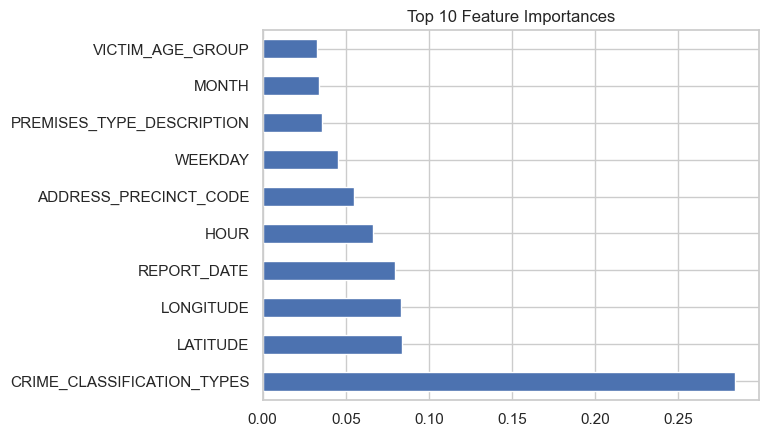

In [1412]:

feature_importances = pd.Series(rf_classifier.feature_importances_, index=X_train.columns)
feature_importances.nlargest(10).plot(kind='barh')
plt.title("Top 10 Feature Importances")
plt.show()


In [1413]:

# Scale the training data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

log_reg_model = LogisticRegression(penalty='l2', C=1.0, solver='liblinear', random_state=42)
log_reg_model.fit(X_train_scaled, y_train)

LogisticRegression(random_state=42, solver='liblinear')

In [1414]:

# Set up the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30]
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42, warm_start=True), param_grid, cv=3, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

print(f"Best Parameters: {grid_search.best_params_}")

Best Parameters: {'max_depth': 30, 'n_estimators': 300}


In [830]:
# Train the final model with the best hyperparameters
final_model = RandomForestClassifier(max_depth=30, n_estimators=200, random_state=42)
final_model.fit(X_train_scaled, y_train)

# Scale the test data
X_test_scaled = scaler.transform(X_test)

# Make predictions
y_pred = final_model.predict(X_test_scaled)

# Evaluate the final model
from sklearn.metrics import classification_report, accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(f"Final Model Accuracy: {accuracy:.2f}")
print(classification_report(y_test, y_pred))


Final Model Accuracy: 1.00
              precision    recall  f1-score   support

           0       0.94      0.81      0.87        42
           1       0.99      1.00      1.00      5874
           2       1.00      0.94      0.97       367
           3       0.99      1.00      1.00      2133
           4       1.00      0.55      0.71        11
           5       1.00      1.00      1.00      7198

    accuracy                           1.00     15625
   macro avg       0.99      0.88      0.92     15625
weighted avg       1.00      1.00      1.00     15625



In [1415]:


importances = final_model.feature_importances_
sorted_indices = np.argsort(importances)[::-1]

for i in sorted_indices:
    print(f"Feature: {X.columns[i]}, Importance: {importances[i]}")

Feature: CRIME_CLASSIFICATION_TYPES, Importance: 0.43103008713597923
Feature: LATITUDE, Importance: 0.05851733802867779
Feature: LONGITUDE, Importance: 0.05736796121152981
Feature: REPORT_DATE, Importance: 0.05402698204029865
Feature: HOUR, Importance: 0.04433846644479357
Feature: ADDRESS_PRECINCT_CODE, Importance: 0.039592912259302546
Feature: WEEKDAY, Importance: 0.029664799478388144
Feature: PREMISES_TYPE_DESCRIPTION, Importance: 0.029523132774317208
Feature: VICTIM_AGE_GROUP, Importance: 0.027302493777149005
Feature: MONTH, Importance: 0.023078183243695146
Feature: VICTIM_RACE, Importance: 0.02181719016029938
Feature: SUSPECT_AGE_GROUP_25-44, Importance: 0.014411742929459832
Feature: PATROL_BOROUGH, Importance: 0.01389554981645413
Feature: CRIME_ATTEMPT_COMPLETED_CODE, Importance: 0.013860178634414239
Feature: SUSPECT_AGE_GROUP_45-64, Importance: 0.013422097487426028
Feature: SUSPECT_RACE_WHITE HISPANIC, Importance: 0.013379887841962779
Feature: SUSPECT_SEX_M, Importance: 0.0126499

##### Final model evaluation

In [1417]:
# Display the final accuracy score and r2 score
print(f"Final Model Accuracy: {accuracy_final:.2f}")
print(f"Final R² Score: {r2_final}")


Final Model Accuracy: 0.71
Final R² Score: 0.2128356824876585


In [1422]:


# Initialize the MLPClassifier
mlp_model = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42)

# Perform 5-fold cross-validation on the MLP model
cross_val_scores_mlp = cross_val_score(mlp_model, X, y, cv=5, scoring='accuracy')

# Display the cross-validation scores
print(f"MLP Cross-Validation Scores: {cross_val_scores_mlp.mean():.2f} \u00B1 {cross_val_scores_mlp.std():.2f}")

MLP Cross-Validation Scores: 0.58 ± 0.04


In [1423]:
# Train the MLPClassifier
mlp_model.fit(X_train, y_train)

# Get the number of epochs the model ran
epochs = mlp_model.n_iter_
print(f"Number of epochs: {epochs}")

# Evaluate the model on the test set
score = mlp_model.score(X_test, y_test)
print(f"Model score: {score:.2f}")
# Check the activation function used
activation_function = mlp_model.activation
print(f"Activation function: {activation_function}")

Number of epochs: 63
Model score: 0.64
Activation function: relu


In [1424]:


# Set up the parameter grid for grid search
param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (150,)],  # Try different sizes
    'activation': ['relu', 'tanh'],  # Try different activation functions
    'learning_rate_init': [0.001, 0.01, 0.1],  # Different learning rates
    'max_iter': [100, 200, 300]  # Different epochs
}

# Initialize the model
mlp = MLPClassifier(random_state=42)

# Set up the grid search
grid_search = GridSearchCV(mlp, param_grid, cv=3, scoring='accuracy', n_jobs=-1)

# Fit grid search
grid_search.fit(X_train, y_train)

# Get the best parameters
print("Best parameters found:", grid_search.best_params_)

# Train final model with the best parameters
best_mlp = grid_search.best_estimator_
best_mlp.fit(X_train, y_train)

# Predict and evaluate
y_pred_best = best_mlp.predict(X_test)
accuracy_best = accuracy_score(y_test, y_pred_best)
print(f"Optimized Neural Network Accuracy: {accuracy_best:.2f}")


Best parameters found: {'activation': 'relu', 'hidden_layer_sizes': (50,), 'learning_rate_init': 0.001, 'max_iter': 100}
Optimized Neural Network Accuracy: 0.59


In [1631]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build the Keras model with the optimized parameters
model_optimized = Sequential()

# Input layer and first hidden layer with relu and 50 units
model_optimized.add(Dense(50, activation='relu', input_shape=(X_train_scaled.shape[1],)))

# Output layer with sigmoid activation for binary classification
model_optimized.add(Dense(1, activation='sigmoid'))

# Compile the model
model_optimized.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model with optimized number of iterations (max_iter = 100)
history_optimized = model_optimized.fit(X_train_scaled, y_train, epochs=500, batch_size=32, validation_split=0.2)

# Evaluate the model on the test set
y_pred_optimized_keras = (model_optimized.predict(X_test_scaled) > 0.5).astype(int)
accuracy_optimized_keras = accuracy_score(y_test, y_pred_optimized_keras)

# Display the accuracy
print(f"Optimized Neural Network Accuracy (Keras): {accuracy_optimized_keras:.2f}")

# Classification report
print(classification_report(y_test, y_pred_optimized_keras))


Epoch 1/500


/opt/anaconda3/envs/dev/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



1808/1808 ━━━━━━━━━━━━━━━━━━━━ 1s 362us/step - accuracy: 0.3332 - loss: -8.1379 - val_accuracy: 0.3196 - val_loss: -81.5051
Epoch 2/500
1808/1808 ━━━━━━━━━━━━━━━━━━━━ 1s 320us/step - accuracy: 0.3161 - loss: -128.5158 - val_accuracy: 0.3182 - val_loss: -302.8619
Epoch 3/500
1808/1808 ━━━━━━━━━━━━━━━━━━━━ 1s 308us/step - accuracy: 0.3166 - loss: -380.7978 - val_accuracy: 0.3184 - val_loss: -632.4955
Epoch 4/500
1808/1808 ━━━━━━━━━━━━━━━━━━━━ 1s 319us/step - accuracy: 0.3173 - loss: -743.8882 - val_accuracy: 0.3187 - val_loss: -1056.5837
Epoch 5/500
1808/1808 ━━━━━━━━━━━━━━━━━━━━ 1s 295us/step - accuracy: 0.3191 - loss: -1166.0320 - val_accuracy: 0.3187 - val_loss: -1570.2438
Epoch 6/500
1808/1808 ━━━━━━━━━━━━━━━━━━━━ 1s 296us/step - accuracy: 0.3187 - loss: -1738.9532 - val_accuracy: 0.3190 - val_loss: -2169.9050
Epoch 7/500
1808/1808 ━━━━━━━━━━━━━━━━━━━━ 1s 295us/step - accuracy: 0.3156 - loss: -2298.5437 - val_accuracy: 0.3188 - val_loss: -2863.4717
Epoch 8/500
1808/1808 ━━━━━━━━━━━━━

/opt/anaconda3/envs/dev/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/opt/anaconda3/envs/dev/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/opt/anaconda3/envs/dev/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



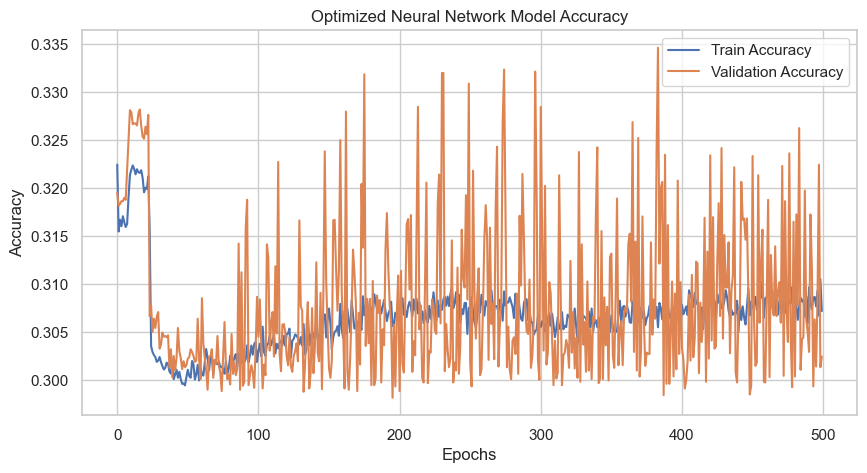

In [1632]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(10, 5))
plt.plot(history_optimized.history['accuracy'], label='Train Accuracy')
plt.plot(history_optimized.history['val_accuracy'], label='Validation Accuracy')
plt.title('Optimized Neural Network Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()



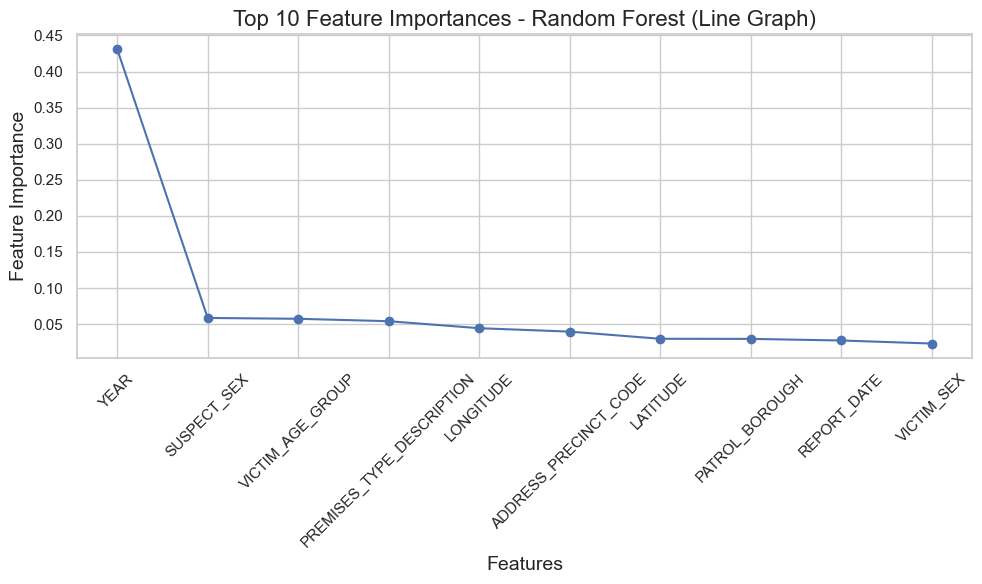

In [1630]:
import matplotlib.pyplot as plt

# Sort feature importances in descending order
sorted_indices = np.argsort(importances)[::-1]

# Get the top 10 features and their importance values
top_features = [X_train.columns[i] for i in sorted_indices[:10]]
top_importances = importances[sorted_indices[:10]]

# Plot a line graph of feature importance
plt.figure(figsize=(10, 6))
plt.plot(top_features, top_importances, marker='o', linestyle='-', color='b')
plt.title("Top 10 Feature Importances - Random Forest (Line Graph)", fontsize=16)
plt.xlabel("Features", fontsize=14)
plt.ylabel("Feature Importance", fontsize=14)
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


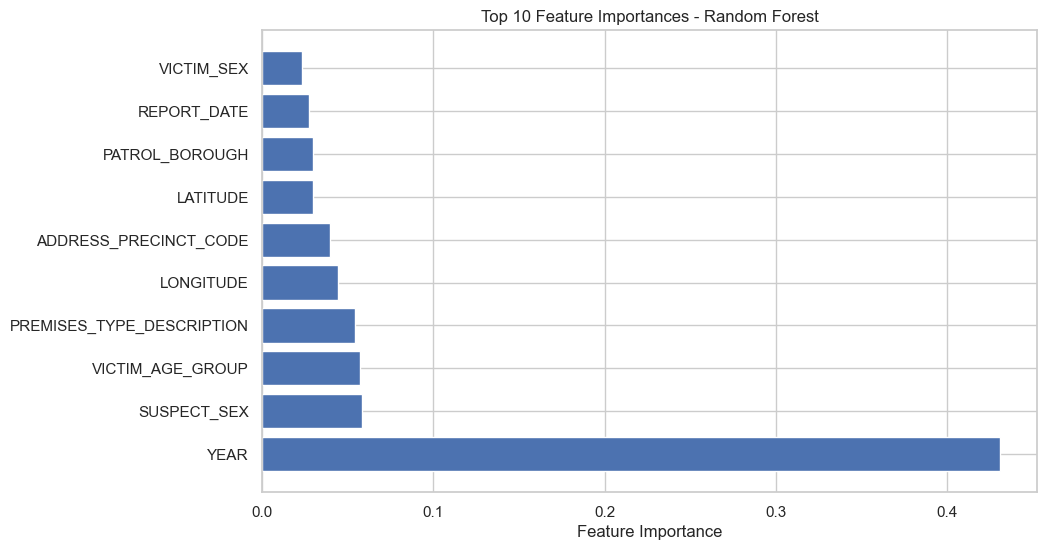

In [1628]:
# Random Forest Feature Importances
importances = final_model.feature_importances_
indices = np.argsort(importances)[::-1]



# Plot the top 10 most important features
plt.figure(figsize=(10, 6))
plt.barh(range(10), importances[indices[:10]], align='center')
plt.yticks(range(10), [X_train.columns[i] for i in indices[:10]])
plt.title("Top 10 Feature Importances - Random Forest")
plt.xlabel("Feature Importance")
plt.show()
